Task 1: Data Filtering

In [1]:
%pip install "dask[dataframe]" pandas langdetect

# Install NLP and Plotting libraries
%pip install spacy nltk wordcloud seaborn matplotlib

# Download the English language model for spaCy
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     - 0 bytes ? 0:00:000m
ERROR: Wheel 'en-core-web-sm' located at /private/var/folders/gp/cdw2kmg51lj5xg8c7ztndxf00000gn/T/pip-unpack-6zga31je/en_core_web_sm-3.8.0-py3-none-any.whl is invalid.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

In [3]:
# CONFIGURATION
# Establish input and output files
INPUT_FILE = '../../data/filtered_reviews.csv'
OUTPUT_FILE = '../../data/processed_text.csv'

# Load the English model for spaCy (lemmatization)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # Disable parser/ner for speed

# Download NLTK stopwords
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Add custom stopwords specific to gaming/Steam if needed
custom_stops = {'game', 'play', 'played', 'hour', 'time', 'steam'} 
stop_words.update(custom_stops)

In [4]:
# 1. Load data and define ML problem
print(f"Loading data from {INPUT_FILE}...")
df = pd.read_csv(INPUT_FILE)

# Quick check to ensure no empty reviews slipped through
df = df.dropna(subset=['review'])
print(f"Loaded {len(df)} reviews.")

# Number of rows and columns
print(f"\nShape of Dataset: ", df.shape)
display(f"Dataframe's head: ", df.head())


# Definition
# Supervised Learning - Binary Classification Problem
# Label - Voted Up (True/False), predict whether a review is positive (voted up) or 
# negative (not voted up) based on features and text content

Loading data from ../../data/filtered_reviews.csv...
Loaded 193166 reviews.

Shape of Dataset:  (193166, 12)


"Dataframe's head: "

,game,author_num_games_owned,author_num_reviews,author_playtime_at_review,language,review,voted_up,votes_funny,weighted_vote_score,steam_purchase,received_for_free,written_during_early_access
0,Counter-Strike,41.0,10.0,221.0,english,cs 1.6>cs2,1,13.0,0.863652,1,0,0
1,Counter-Strike,0.0,1.0,396410.0,english,#1 PLAYED PC GAME ONLINE SINCE 1999,1,1.0,0.865922,1,0,0
2,Counter-Strike,50.0,50.0,81.0,english,"best played with a membrane keyboard, a roller...",1,31.0,0.935513,1,0,0
3,Counter-Strike,11.0,5.0,78.0,english,My friend who I play counter-strike with said ...,1,19.0,0.875650,1,0,0
4,Counter-Strike,0.0,27.0,26568.0,english,Counter-Strike won't ever be canceled. Counter...,1,2.0,0.877432,1,0,0


In [5]:
# 2. Text Preprocessing Function (Lowercase, remove special characters/numbers, tokenize, lemmatize, and remove stopwords 
def preprocess_text(text):
    # Lowercase & basic cleanup via Regex
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Process with spaCy
    doc = nlp(text)
    
    # Lemmatize and filter stopwords/
    cleaned_tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_space]
    
    return " ".join(cleaned_tokens)

In [6]:
print("Starting text preprocessing")

# Apply the function to the 'review' column
# df['cleaned_review'] = df['review'].apply(preprocess_text)

print("Preprocessing complete!")
# Save Output
# Save the dataset with the new 'cleaned_review' column
# df.to_csv(OUTPUT_FILE, index=False)
# print(f"Saved processed data to {OUTPUT_FILE}")

Starting text preprocessing
Preprocessing complete!


In [7]:
df = pd.read_csv(OUTPUT_FILE)
df['cleaned_review'] = df['cleaned_review'].fillna('')

Generating Word Cloud...


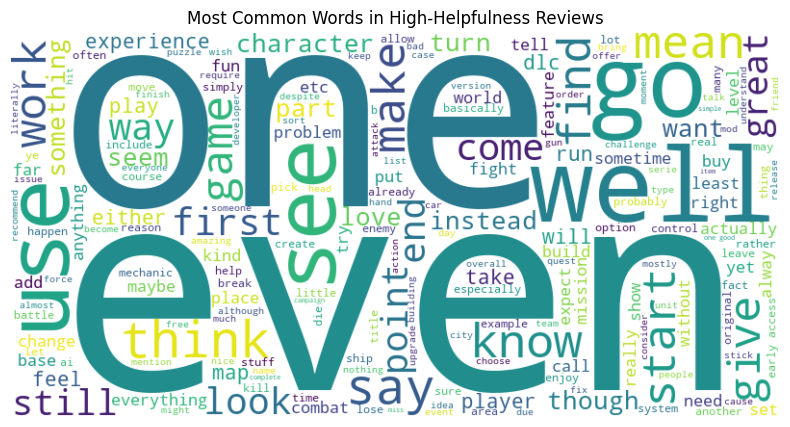

In [8]:
# 3. Word Cloud
print("Generating Word Cloud...")
all_text = " ".join(df['cleaned_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in High-Helpfulness Reviews')
plt.show()

Generating Frequency Plot...


/var/folders/gp/cdw2kmg51lj5xg8c7ztndxf00000gn/T/ipykernel_87324/3365029400.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Frequency', y='Word', palette='viridis')


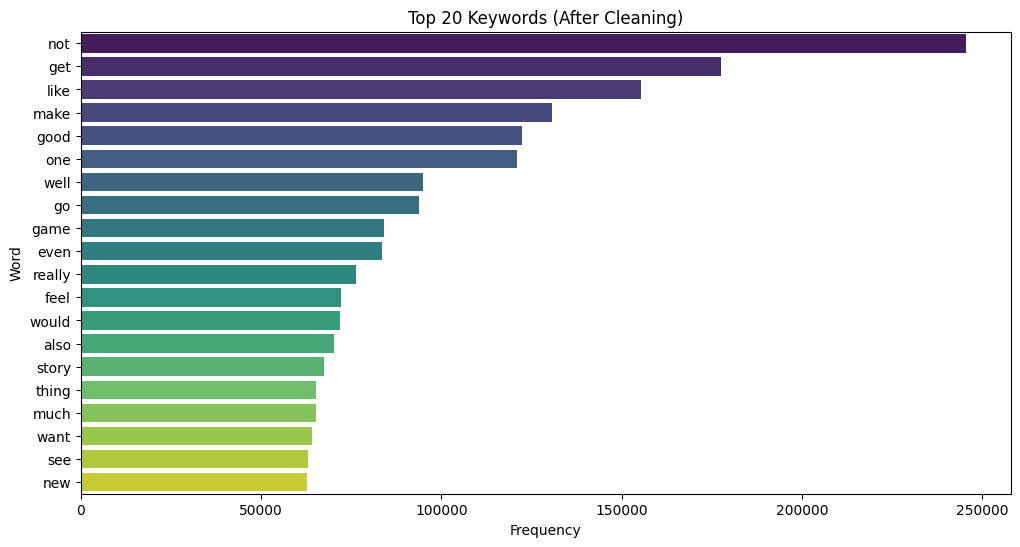

In [9]:
# 4. Keyword Frequency Plot
print("Generating Frequency Plot...")
# Split all cleaned reviews into a giant list of words
all_words = " ".join(df['cleaned_review']).split()
word_freq = Counter(all_words)

# Get top 20 words
common_words = word_freq.most_common(20)
words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(data=words_df, x='Frequency', y='Word', palette='viridis')
plt.title('Top 20 Keywords (After Cleaning)')
plt.show()

Generating Correlation Heatmap...


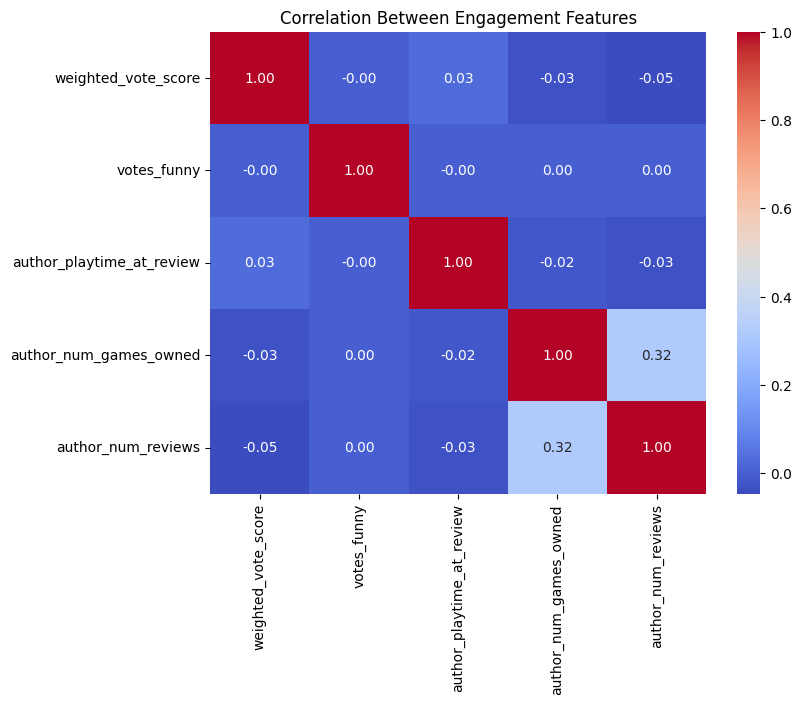

In [10]:
# 5. Correlation Heatmap
print("Generating Correlation Heatmap...")

# Select only numerical columns for correlation
numeric_cols = [
    'weighted_vote_score', 'votes_funny', 'author_playtime_at_review', 
    'author_num_games_owned', 'author_num_reviews'
]

categorical_cols = ['language', 'steam_purchase', 'received_for_free', 'written_during_early_access']

# Calculate correlation matrix
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Engagement Features')
plt.show()

,weighted_vote_score,votes_funny,author_playtime_at_review,author_num_games_owned,author_num_reviews
count,193166.000000,1.931660e+05,1.931660e+05,193166.000000,193166.000000
mean,0.858477,4.454213e+04,1.072348e+04,415.369480,49.129842
std,0.042107,1.382001e+07,6.006570e+04,1331.560964,153.630452
min,0.800000,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,0.823212,3.000000e+00,1.180000e+02,0.000000,5.000000
50%,0.850720,1.100000e+01,6.420000e+02,48.000000,14.000000
75%,0.887437,4.900000e+01,2.909000e+03,330.000000,40.000000
max,0.995547,4.294967e+09,4.776595e+06,30425.000000,10413.000000


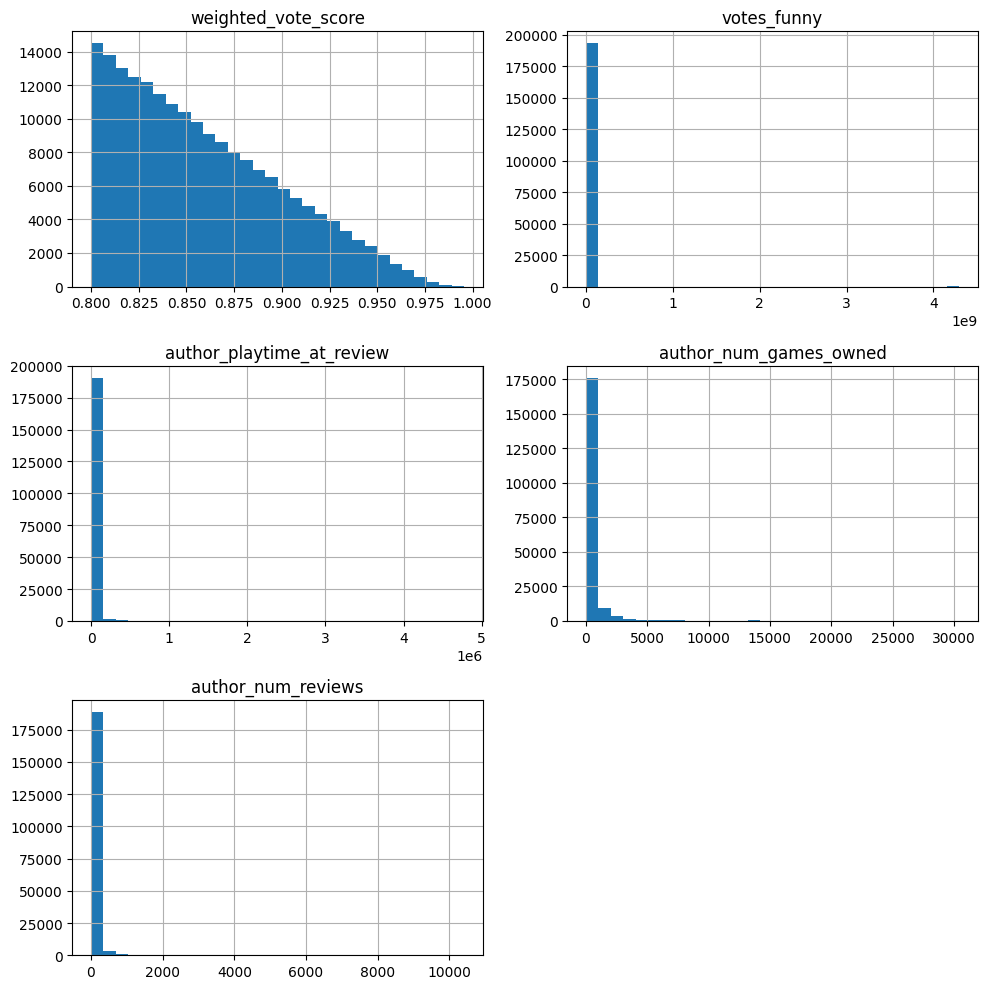

In [11]:
# Exploratory Analysis
display(df[numeric_cols].describe())
df[numeric_cols].hist(bins=30, figsize=(10,10))
plt.tight_layout()
plt.show()

In [12]:
# We can see that the features are all extremely right skewed with clear outliers
# Weighted_vote_score has a nice gradual right skew while every other feature has a clear tail with large outliers
# This shows a need for feature standardization

In [13]:
# 6. Save Output
# Save the dataset with the new 'cleaned_review' column
df.to_csv(OUTPUT_FILE, index=False)
print(f"Saved processed data to {OUTPUT_FILE}")

Saved processed data to ../../data/processed_text.csv


In [14]:
features = ['author_playtime_at_review', 'author_num_games_owned', 'author_num_reviews', 'votes_funny', 'weighted_vote_score']

target = 'voted_up'
df[target] = df[target].astype(int)

X = df[features]
y = df[target]

In [15]:
# imputer to handle missing data
imp = SimpleImputer(strategy='mean')
X_imp = imp.fit_transform(X)

# scale data for logistical regression
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_imp)

In [16]:
# train data
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=0)

In [17]:
# initialize the simple models
knn = KNeighborsClassifier(n_neighbors=5)
logmodel = LogisticRegression(random_state=0)
decisiontree = DecisionTreeClassifier(random_state=0)

In [18]:
# train models
print("Training Logistic Regression Model:")
logmodel.fit(X_train, y_train)
y_pred_log = logmodel.predict(X_test)
print("Training Decision Tree Model:")
decisiontree.fit(X_train, y_train)
y_pred_dt = decisiontree.predict(X_test)
print("Training KNN:")
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Training Logistic Regression Model:
Training Decision Tree Model:
Training KNN:


In [19]:
# display results
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Precision: {precision_score(y_test, y_pred_log)}")
print(f"Recall: {recall_score(y_test, y_pred_log)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log)}")
print("")
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_dt)}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt)}")
print("")
print("KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn)}")

Logistic Regression:
Accuracy: 0.8100119066107574
Precision: 0.8100119066107574
Recall: 1.0
F1 Score: 0.8950348930328338

Decision Tree:
Accuracy: 0.7102293316767614
Precision: 0.8279541820317854
Recall: 0.810730491468013
F1 Score: 0.8192518203981465

KNN:
Accuracy: 0.7777864057565874
Precision: 0.8137729018708376
Recall: 0.941011056432543
F1 Score: 0.8727790044605148


array([[    0,  7340],
       [    0, 31294]])

array([[ 2068,  5272],
       [ 5923, 25371]])

array([[  601,  6739],
       [ 1846, 29448]])

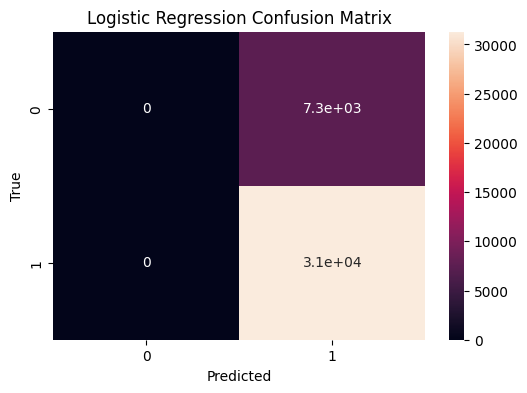

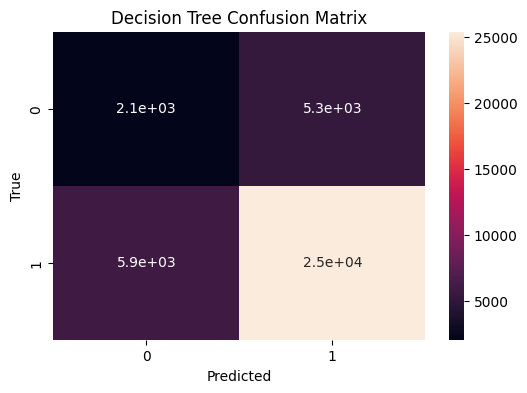

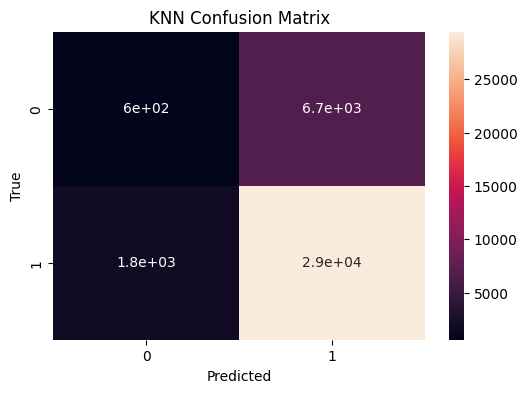

In [20]:
# Confusion Matrices for the simple models

# Logistic Regression
display(confusion_matrix(y_test, y_pred_log));
plt.figure(figsize = (6, 4));
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');
plt.title('Logistic Regression Confusion Matrix');

# Decision Tree
display(confusion_matrix(y_test, y_pred_dt));
plt.figure(figsize = (6, 4));
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');
plt.title('Decision Tree Confusion Matrix');

# KNN
display(confusion_matrix(y_test, y_pred_knn));
plt.figure(figsize = (6, 4));
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');
plt.title('KNN Confusion Matrix');

In [21]:
print(df['voted_up'].value_counts(normalize=True))
print("This shows that logistic regression just guessed 'positive' for all of the reviews.")

voted_up
1    0.807306
0    0.192694
Name: proportion, dtype: float64
This shows that logistic regression just guessed 'positive' for all of the reviews.


In [22]:
# the more advanced models
for col in ['steam_purchase', 'received_for_free', 'written_during_early_access']:
    if col in df.columns:
        df[col] = df[col].astype(int)

X_adv = df[numeric_cols + categorical_cols +  ['cleaned_review']]
y_adv = df['voted_up'].astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.2, random_state=0)

In [24]:
# numerical transformer
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
# converts text into numerical vectors
text_transformer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
# cat variables
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
preproc = ColumnTransformer(transformers=[('num', numerical_transformer, numeric_cols), ('cat', categorical_transformer, categorical_cols), ('txt', text_transformer, 'cleaned_review')])

In [25]:
# random forest
print("Training Random Forest: ")
randomforest = Pipeline(steps=[('preprocessor', preproc), ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0, n_jobs = 1))])
randomforest.fit(X_train, y_train)
y_pred_train = randomforest.predict(X_train)
y_pred_randomforest = randomforest.predict(X_test)
print("")
print("Random Forest: ")
print(f"Training Accuracy:  {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_randomforest)}")
print(f"Precision: {precision_score(y_test, y_pred_randomforest)}")
print(f"Recall:    {recall_score(y_test, y_pred_randomforest)}")
print(f"F1 Score:  {f1_score(y_test, y_pred_randomforest)}")

# A training accuracy of 1.0 is a clear sign of overfitting

Training Random Forest: 

Random Forest: 
Training Accuracy:  1.0
Accuracy:  0.8725733809597763
Precision: 0.8732625619249823
Recall:    0.9857480667220554
F1 Score:  0.9261021630465783


In [27]:
# optimizing random forest
X_sub, unused, y_sub, unused2 = train_test_split(X_train, y_train, train_size=10000, stratify=y_train, random_state=0)
rf_pipe = Pipeline(steps=[("preprocessor", preproc), 
                          ("classifier", RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=1))])
rf_params = {
     "classifier__n_estimators": [100, 200], 
     "classifier__max_depth": [100, 200, 300], 
     "classifier__min_samples_split": [2, 10], 
     "classifier__min_samples_leaf": [1, 5], 
     "classifier__max_features": ["sqrt", 0.5],
}

rf_grid = GridSearchCV(rf_pipe, param_grid=rf_params, scoring="accuracy", cv=3, n_jobs=-1)
rf_grid.fit(X_sub, y_sub)

rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_pred_train = rf_best.predict(X_train)
rf_prob = rf_best.predict_proba(X_test)[:, 1]

print("Random Forest Optimized: ")
print(f"Training Accuracy:  {accuracy_score(y_train, rf_pred_train)}")
print(f"Accuracy:  {accuracy_score(y_test, rf_pred)}")
print(f"Precision: {precision_score(y_test, rf_pred)}")
print(f"Recall:    {recall_score(y_test, rf_pred)}")
print(f"F1 Score:  {f1_score(y_test, rf_pred)}")

# Accuracy is weaker than default parameters

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Random Forest Optimized: 
Training Accuracy:  0.859957808091528
Accuracy:  0.8558005901537505
Precision: 0.9152487650534337
Recall:    0.9058605483479262
F1 Score:  0.9105304575457305


In [28]:
# gradient boosting

print("Training Gradient Boosting: ")
gradientboosting = Pipeline(steps=[('preprocessor', preproc), ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0))])
gradientboosting.fit(X_train, y_train)
y_pred_gradientboosting = gradientboosting.predict(X_test)
print("")
print("Gradient Boosting: ")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_gradientboosting)}")
print(f"Precision: {precision_score(y_test, y_pred_gradientboosting)}")
print(f"Recall:    {recall_score(y_test, y_pred_gradientboosting)}")
print(f"F1 Score:  {f1_score(y_test, y_pred_gradientboosting)}")

Training Gradient Boosting: 
[CV] END classifier__max_depth=33, classifier__max_features=0.4879863034250344, classifier__max_samples=0.6963923980504149, classifier__min_samples_leaf=10, classifier__min_samples_split=15, classifier__n_estimators=172; total time= 2.3min
[CV] END classifier__max_depth=19, classifier__max_features=0.5889031232307183, classifier__max_samples=0.684120769920274, classifier__min_samples_leaf=6, classifier__min_samples_split=17, classifier__n_estimators=199; total time= 2.3min
[CV] END classifier__max_depth=11, classifier__max_features=0.28601197244542786, classifier__max_samples=0.972334458524792, classifier__min_samples_leaf=5, classifier__min_samples_split=5, classifier__n_estimators=283; total time= 1.7min
[CV] END classifier__max_depth=50, classifier__max_features=0.5701603981248542, classifier__max_samples=0.9718740392573121, classifier__min_samples_leaf=10, classifier__min_samples_split=12, classifier__n_estimators=131; total time= 3.0min
[CV] END classi

In [30]:
# optimizing gradient boosting

gb_pipe = Pipeline(steps=[("preprocessor", preproc), 
                          ("classifier", GradientBoostingClassifier(random_state=0))])
gb_params = {
     "classifier__n_estimators": [100, 200], 
     "classifier__learning_rate": [.01, .05, .1], 
     "classifier__max_depth": [3, 5], 
     "classifier__subsample": [.8, 1]
}

gb_grid = GridSearchCV(gb_pipe, param_grid=gb_params, scoring="f1", cv=3, n_jobs=-1, verbose=2)
gb_grid.fit(X_sub, y_sub)

gb_best = gb_grid.best_estimator_
gb_pred = gb_best.predict(X_test)
gb_prob = gb_best.predict_proba(X_test)[:, 1]

print("Gradient Boosting otimized: ")
print(f"Accuracy:  {accuracy_score(y_test, gb_pred)}")
print(f"Precision: {precision_score(y_test, gb_pred)}")
print(f"Recall:    {recall_score(y_test, gb_pred)}")
print(f"F1 Score:  {f1_score(y_test, gb_pred)}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Gradient Boosting otimized: 
Accuracy:  0.8601232075374022
Precision: 0.8663195427019073
Recall:    0.9782705950022369
F1 Score:  0.9188978268699723


In [31]:
# adaboost
adaboost = Pipeline(steps=[('preprocessor', preproc), ('classifier', AdaBoostClassifier(n_estimators=50, random_state=0))])
print("Training AdaBoost: ")
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
print("")
print("Ada Boosting: ")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_adaboost)}")
print(f"Precision: {precision_score(y_test, y_pred_adaboost)}")
print(f"Recall:    {recall_score(y_test, y_pred_adaboost)}")
print(f"F1 Score:  {f1_score(y_test, y_pred_adaboost)}")

Training AdaBoost: 

Ada Boosting: 
Accuracy:  0.8225914997152767
Precision: 0.8249481465723555
Recall:    0.9913401930082444
F1 Score:  0.900522496371553


In [32]:
# support vector machine
svm_model = Pipeline(steps=[('preprocessor', preproc), ('classifier', LinearSVC(C=1.0, random_state=0, dual='auto'))])
print("Training Linear SVM: ")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("")
print("Linear SVM: ")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall:    {recall_score(y_test, y_pred_svm)}")
print(f"F1 Score:  {f1_score(y_test, y_pred_svm)}")

Training Linear SVM: 

Linear SVM: 
Accuracy:  0.8969819330123725
Precision: 0.9163465642338882
Recall:    0.9605036109158305
F1 Score:  0.9379056415376935


In [ ]:
# neural network
nn= Pipeline(steps=[('preprocessor', preproc), ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=0))])
print("Training Neural Network: ")
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("")
print("Neural Network: ")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_nn)}")
print(f"Precision: {precision_score(y_test, y_pred_nn)}")
print(f"Recall:    {recall_score(y_test, y_pred_nn)}")
print(f"F1 Score:  {f1_score(y_test, y_pred_nn)}")

Training Neural Network: 
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1; total time=  12.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1; total time=  22.5s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1; total time=  37.1s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1; total time=  22.7s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1; total time=  35.6s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=  18.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1; total time=  

In [ ]:
# Confusion Matrices for the complex models

# Random Forest
display(confusion_matrix(y_test, y_pred_randomforest));
plt.figure(figsize = (6, 4));
sns.heatmap(confusion_matrix(y_test, y_pred_randomforest), annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');
plt.title('Logistic Regression Confusion Matrix');

# Gradient Boosting
display(confusion_matrix(y_test, y_pred_gradientboosting));
plt.figure(figsize = (6, 4));
sns.heatmap(confusion_matrix(y_test, y_pred_gradientboosting), annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');
plt.title('Gradient Boosting Confusion Matrix');

# ADA Boost
display(confusion_matrix(y_test, y_pred_adaboost));
plt.figure(figsize = (6, 4));
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');
plt.title('ADA Boost Confusion Matrix');

# Support Vector Machines
display(confusion_matrix(y_test, y_pred_svm));
plt.figure(figsize = (6, 4));
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');
plt.title('Support Vector Machine Confusion Matrix');

# Neural Network
display(confusion_matrix(y_test, y_pred_nn));
plt.figure(figsize = (6, 4));
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');
plt.title('Neural Network Confusion Matrix');

In [ ]:
# Ada Boost Optimization

ada_pipe = Pipeline(steps=[
    ("preprocessor", preproc),
    ("classifier", AdaBoostClassifier(random_state=0))
])

ada_param = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate":[0.01, 0.1, 1.0]
}

ada_grid = GridSearchCV(
    ada_pipe,
    param_grid=ada_param,
    scoring="f1", 
    cv=3,
    n_jobs=-1
)

ada_grid.fit(X_sub, y_sub)

print("Best AdaBoost Parameters: ", ada_grid.best_params_)

ada_pred = ada_grid.best_estimator_.predict(X_test)
ada_prob = ada_grid.best_estimator_.predict_proba(X_test)[:, 1] # ROC

In [ ]:
# SVM Optimization

svm_pipe = Pipeline(steps=[
    ("preprocessor", preproc),
    ("classifier", LinearSVC(dual="auto"))
])

svm_param = {
    "classifier__C": [0.01, 0.1, 1, 5]
}

svm_grid = GridSearchCV(
    svm_pipe, 
    param_grid=svm_param, 
    cv=3, 
    scoring="f1", 
    n_jobs=-1
)

svm_grid.fit(X_sub, y_sub)

print("Best SVM Parameters: ", svm_grid.best_params_)

svm_pred = svm_grid.best_estimator_.predict(X_test)
svm_prob = svm_grid.best_estima=tor_.decision_function(X_test)

In [ ]:
# Neural Network Optimization

nn_pipe = Pipeline(steps=[
    ("preprocessor", preproc),
    ("classifier", MLPClassifier(max_iter=300, random_state=0))
])

nn_param = {
    "classifier__hidden_layer_sizes": [(50,), (100,), (100, 50)],
    "classifier__alpha": [0.001, 0.01, 0.1],
    "classifier__learning_rate_init": [0.001, 0.01]
}

nn_grid = GridSearchCV(
    nn_pipe, 
    param_grid=nn_param,
    scoring="f1",
    cv=3,
    n_jobs=-1
)

nn_grid.fit(X_sub, y_sub)

print("Best NN Parameters: ", nn_grid.best_params_)

nn_pred = nn_grid.best_estimator_.predict(X_test)
nn_prob = nn_grid.best_estimator_.predict_proba(X_test)[:,1]

In [ ]:
# Precision, Recall, F1

def display_prf(name, y_t, y_pred):
    print(name)
    print(f"Precision: {precision_score(y_t, y_pred)}")
    print(f"Recall: {recall_score(y_t, y_pred)}")
    print(f"F1 Score: {f1_score(y_t, y_pred)}")

display_prf("AdaBoost: ", y_test, ada_pred)
display_prf("Linear SVM: ", y_test, svm_pred)
display_prf("Neural Network", y_test, nn_pred)

# ROC Curves

plt.figure(figsize=(10, 8))

# Adaboost ROC
ada_f, ada_t, _ =  roc_curve(y_test, ada_prob)
ada_auc = roc_auc_score(y_test, ada_prob)
plt.plot(ada_f, ada_t, label=f"AdaBoost (AUC={ada_auc})")

# svm ROC
svm_f, svm_t, _ = roc_curve(y_test, svm_prob)
svm_auc = roc_auc_score(y_test, svm_prob)
plt.plot(svm_f, svm_t, label=f"Linear SVM (AUC={svm_auc})")

# nn ROC
nn_f, nn_t, _ = roc_curve(y_test, nn_prob)
nn_auc = roc_auc_score(y_test, nn_prob)
plt.plot(nn_f, nn_t, label=f"Neural Network (AUC={nn_auc})")

plt.title("Optimized Models ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("\nAUC Scores: ")
print(f"AdaBoost AUC: {ada_auc}")
print(f"SVM AUC: {svm_auc}")
print(f"NN AUC: {nn_auc}")